In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [4]:
DATASET_ID = 'canary_segmented'

In [5]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [6]:
from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio

### create dataset

In [7]:
hparams = HParams(
    num_mel_bins = 32,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=10000,
    butter_lowcut = 500,
    butter_highcut = 10000,
    ref_level_db = 20,
    min_level_db = -25,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 2,
    mask_spec_kwargs = {"spec_thresh": 0.9, "offset": 1e-10},
    nex=-1,
    n_jobs=-1,
    verbosity = 1,
)

In [8]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   21.4s


[Parallel(n_jobs=-1)]: Done 2320 out of 2320 | elapsed:   23.3s finished


In [9]:
dataset.sample_json

OrderedDict([('indvs',
              OrderedDict([('bird3',
                            OrderedDict([('phrases',
                                          OrderedDict([('start_times',
                                                        [0.0,
                                                         0.7312500000000001,
                                                         3.9189583333333333,
                                                         5.8256250000000005,
                                                         7.67,
                                                         8.972708333333333,
                                                         10.576041666666667,
                                                         11.664791666666668,
                                                         13.574166666666667,
                                                         14.690000000000001,
                                                         15.643333333333334,

In [10]:
len(dataset.data_files)

2320

#### Create dataset based upon JSON

In [11]:
from joblib import Parallel, delayed
n_jobs = -1; verbosity = 10

In [12]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=[],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 2320 out of 2320 | elapsed:   16.4s finished


497307

In [13]:
syllable_df[:3]

,start_time,end_time,indv,indvi,key
0,0.000,0.036,bird3,0,bird3_0525_2004_04_19_16_06
1,0.101,0.136,bird3,0,bird3_0525_2004_04_19_16_06
2,0.208,0.247,bird3,0,bird3_0525_2004_04_19_16_06


### get audio for dataset

In [14]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 2320 out of 2320 | elapsed:  2.4min finished


497307

In [15]:
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])

In [16]:
syllable_df = syllable_df[np.array(df_mask)]

In [17]:
syllable_df[:3]

,start_time,end_time,indv,indvi,key,audio,rate
0,0.000,0.036,bird3,0,bird3_0525_2004_04_19_16_06,"[-0.00035844666934084344, -0.00241274566572927...",48000
1,0.101,0.136,bird3,0,bird3_0525_2004_04_19_16_06,"[-0.0004773939214127494, -0.000848170202009539...",48000
2,0.208,0.247,bird3,0,bird3_0525_2004_04_19_16_06,"[0.001146587770345251, 0.0009335143150928722, ...",48000


In [18]:
sylls = syllable_df.audio.values

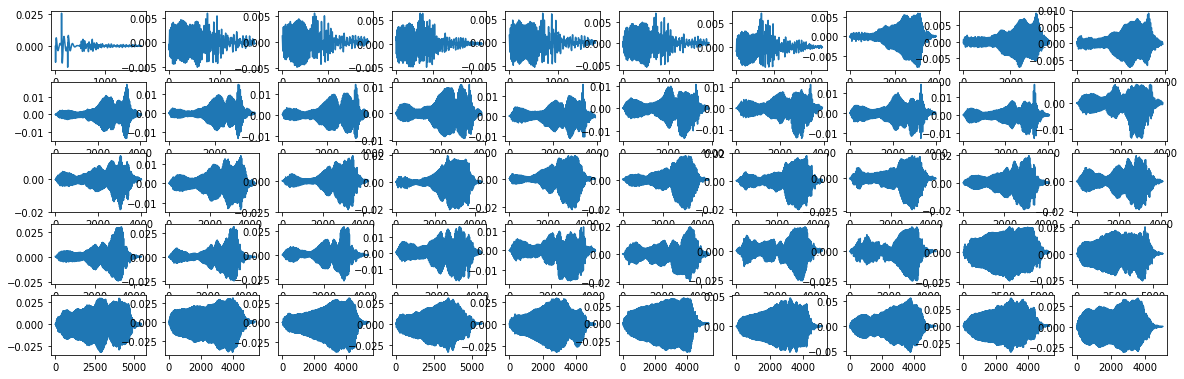

In [19]:
nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

In [20]:
syllable_df['audio'] = [i/np.max(i) for i in syllable_df.audio.values]

### Create spectrograms

In [21]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram

In [22]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [23]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(make_spec)(
            syllable,
            rate,
            hparams=dataset.hparams,
            mel_matrix=dataset.mel_matrix,
            use_mel=True,
            use_tensorflow=False,
        )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0457s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1631s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1818 tasks      | elapsed:    1.6s
[Parallel

[Parallel(n_jobs=-1)]: Done 161874 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 164304 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 166770 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 169236 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 171738 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 174240 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 176778 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 179316 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 181890 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184464 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 187074 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 189684 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192330 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 194976 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 197658 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 497307 out of 497307 | elapsed:  4.2min finished


### Rescale spectrogram
- using log rescaling

In [24]:
log_scaling_factor = 4

In [25]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllables_spec = parallel(
        delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
        for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0173s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1126 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1918 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2798 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3260 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Done 385004 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 390944 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 396884 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 402912 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 408940 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 415056 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 421172 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 427376 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 433580 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 439872 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446164 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 452544 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 458924 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 465392 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 471860 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 497307 out of 497307 | elapsed:  1.7min finished


(25.0, 10) (320, 800) 25.0 32 800


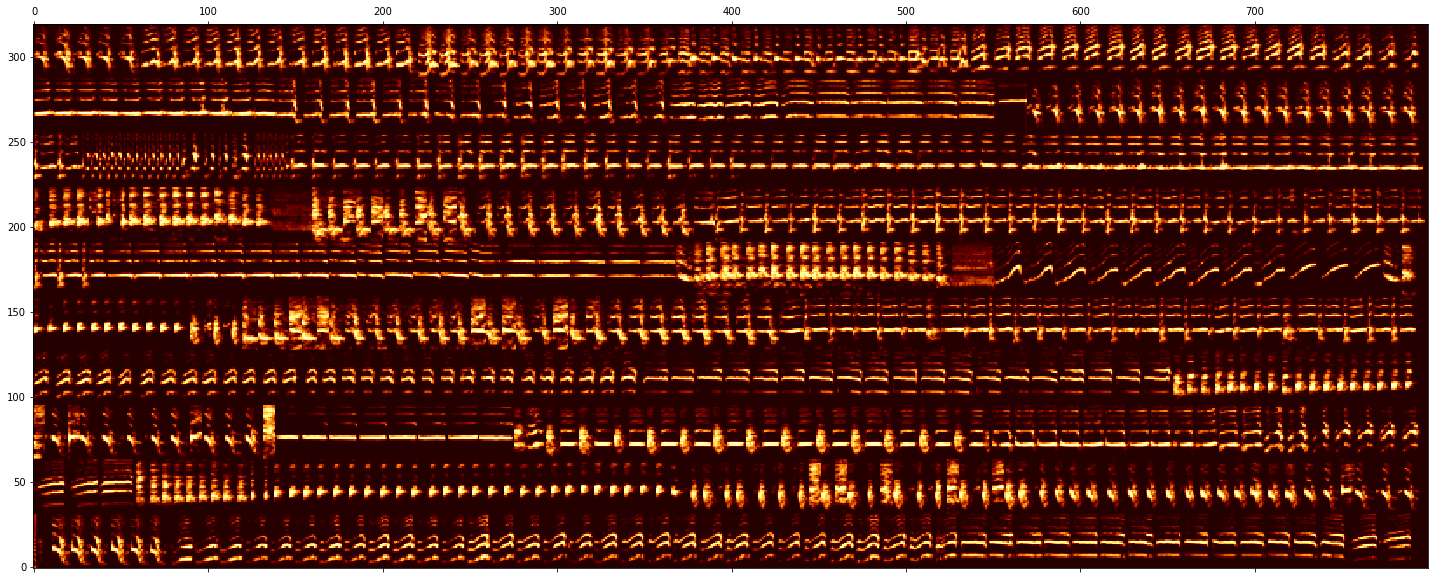

In [26]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

### Pad spectrograms

In [27]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens)

In [28]:
syllable_df[:3]

,start_time,end_time,indv,indvi,key,audio,rate
0,0.000,0.036,bird3,0,bird3_0525_2004_04_19_16_06,"[-0.013927590325060985, -0.09374820877158284, ...",48000
1,0.101,0.136,bird3,0,bird3_0525_2004_04_19_16_06,"[-0.08033924279200529, -0.1427361110642931, -0...",48000
2,0.208,0.247,bird3,0,bird3_0525_2004_04_19_16_06,"[0.20502230290406648, 0.16692246300221994, 0.1...",48000


In [29]:
import seaborn as sns

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


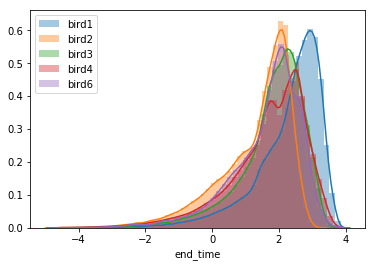

In [30]:
for indv in np.unique(syllable_df.indv):
    sns.distplot(np.log(syllable_df[syllable_df.indv==indv]["end_time"]), label=indv)
plt.legend()

In [31]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0348s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0797s.) Setting batch_size=50.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2938 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3888 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4938 tasks      | elapsed:    1.3s
[Paral

[Parallel(n_jobs=-1)]: Done 442788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 449538 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 456288 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 463138 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 469988 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 476938 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 483888 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 490938 tasks      | elapsed:  1.6min


[Parallel(n_jobs=-1)]: Done 497307 out of 497307 | elapsed:  1.6min finished


(25.0, 10) (320, 800) 25.0 32 800


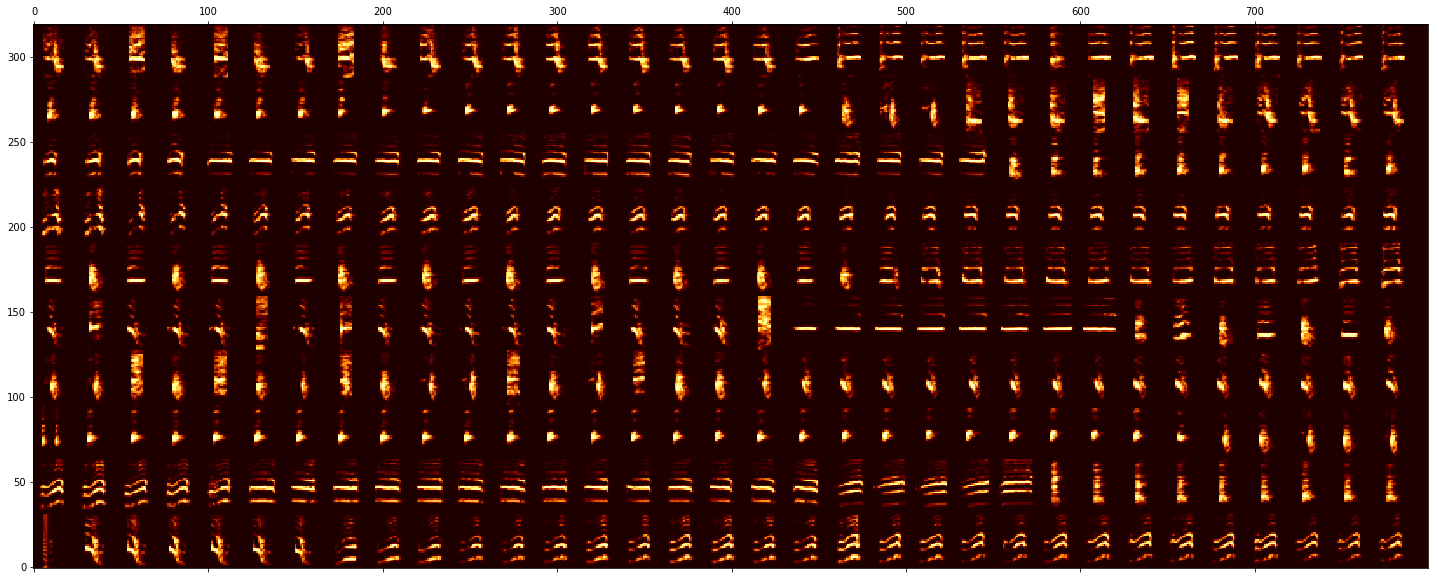

In [32]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [33]:
np.shape(syllables_spec)

(497307, 32, 24)

In [34]:
syllable_df['spectrogram'] = syllables_spec

In [ ]:
# convert to uint8 to save space
syllable_df['spectrogram'] = syllables_spec*255.astype('uint8')

In [39]:
syllable_df[:3]

,start_time,end_time,indv,indvi,key,audio,rate,spectrogram
0,0.000,0.036,bird3,0,bird3_0525_2004_04_19_16_06,"[-0.013927590325060985, -0.09374820877158284, ...",48000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31532124, 0...."
1,0.101,0.136,bird3,0,bird3_0525_2004_04_19_16_06,"[-0.08033924279200529, -0.1427361110642931, -0...",48000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0.208,0.247,bird3,0,bird3_0525_2004_04_19_16_06,"[0.20502230290406648, 0.16692246300221994, 0.1...",48000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


### view syllables per indv

In [36]:
syllable_df.indv.unique()

array(['bird3', 'bird4', 'bird1', 'bird6', 'bird2'], dtype=object)

bird1 107319
(50.0, 32) (512, 800) 25.0 32 800


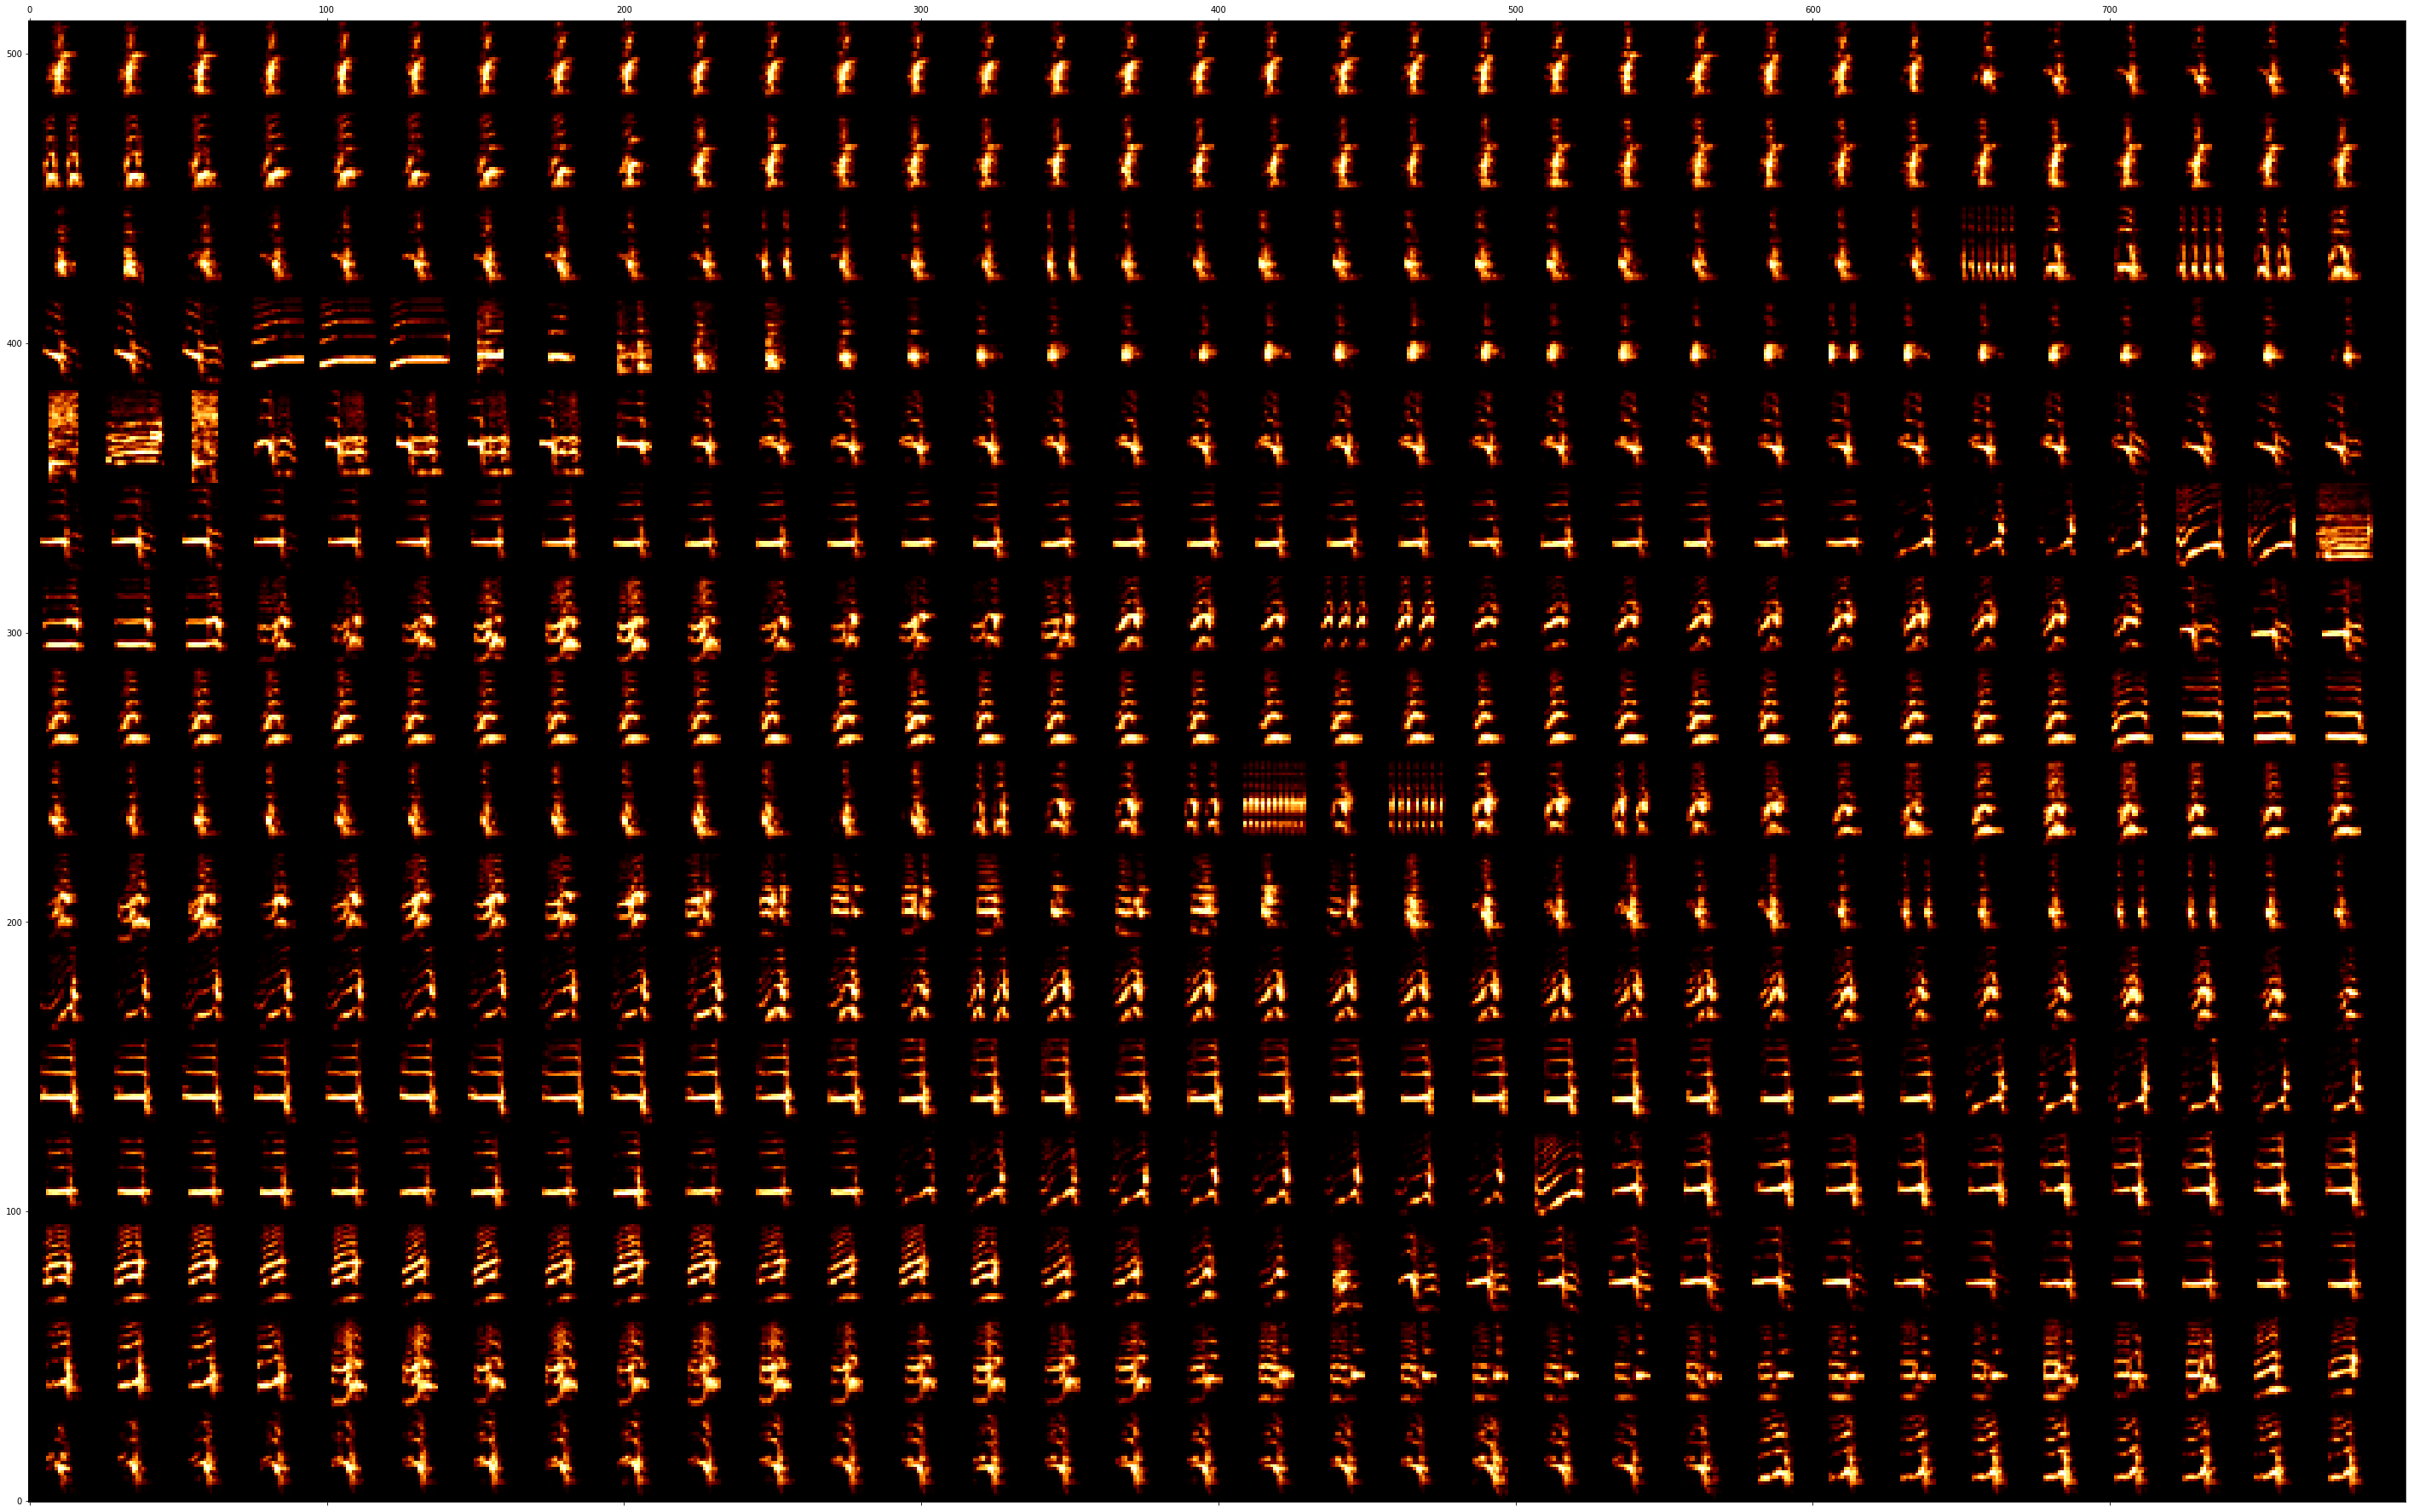

bird2 37043
(50.0, 32) (512, 800) 25.0 32 800


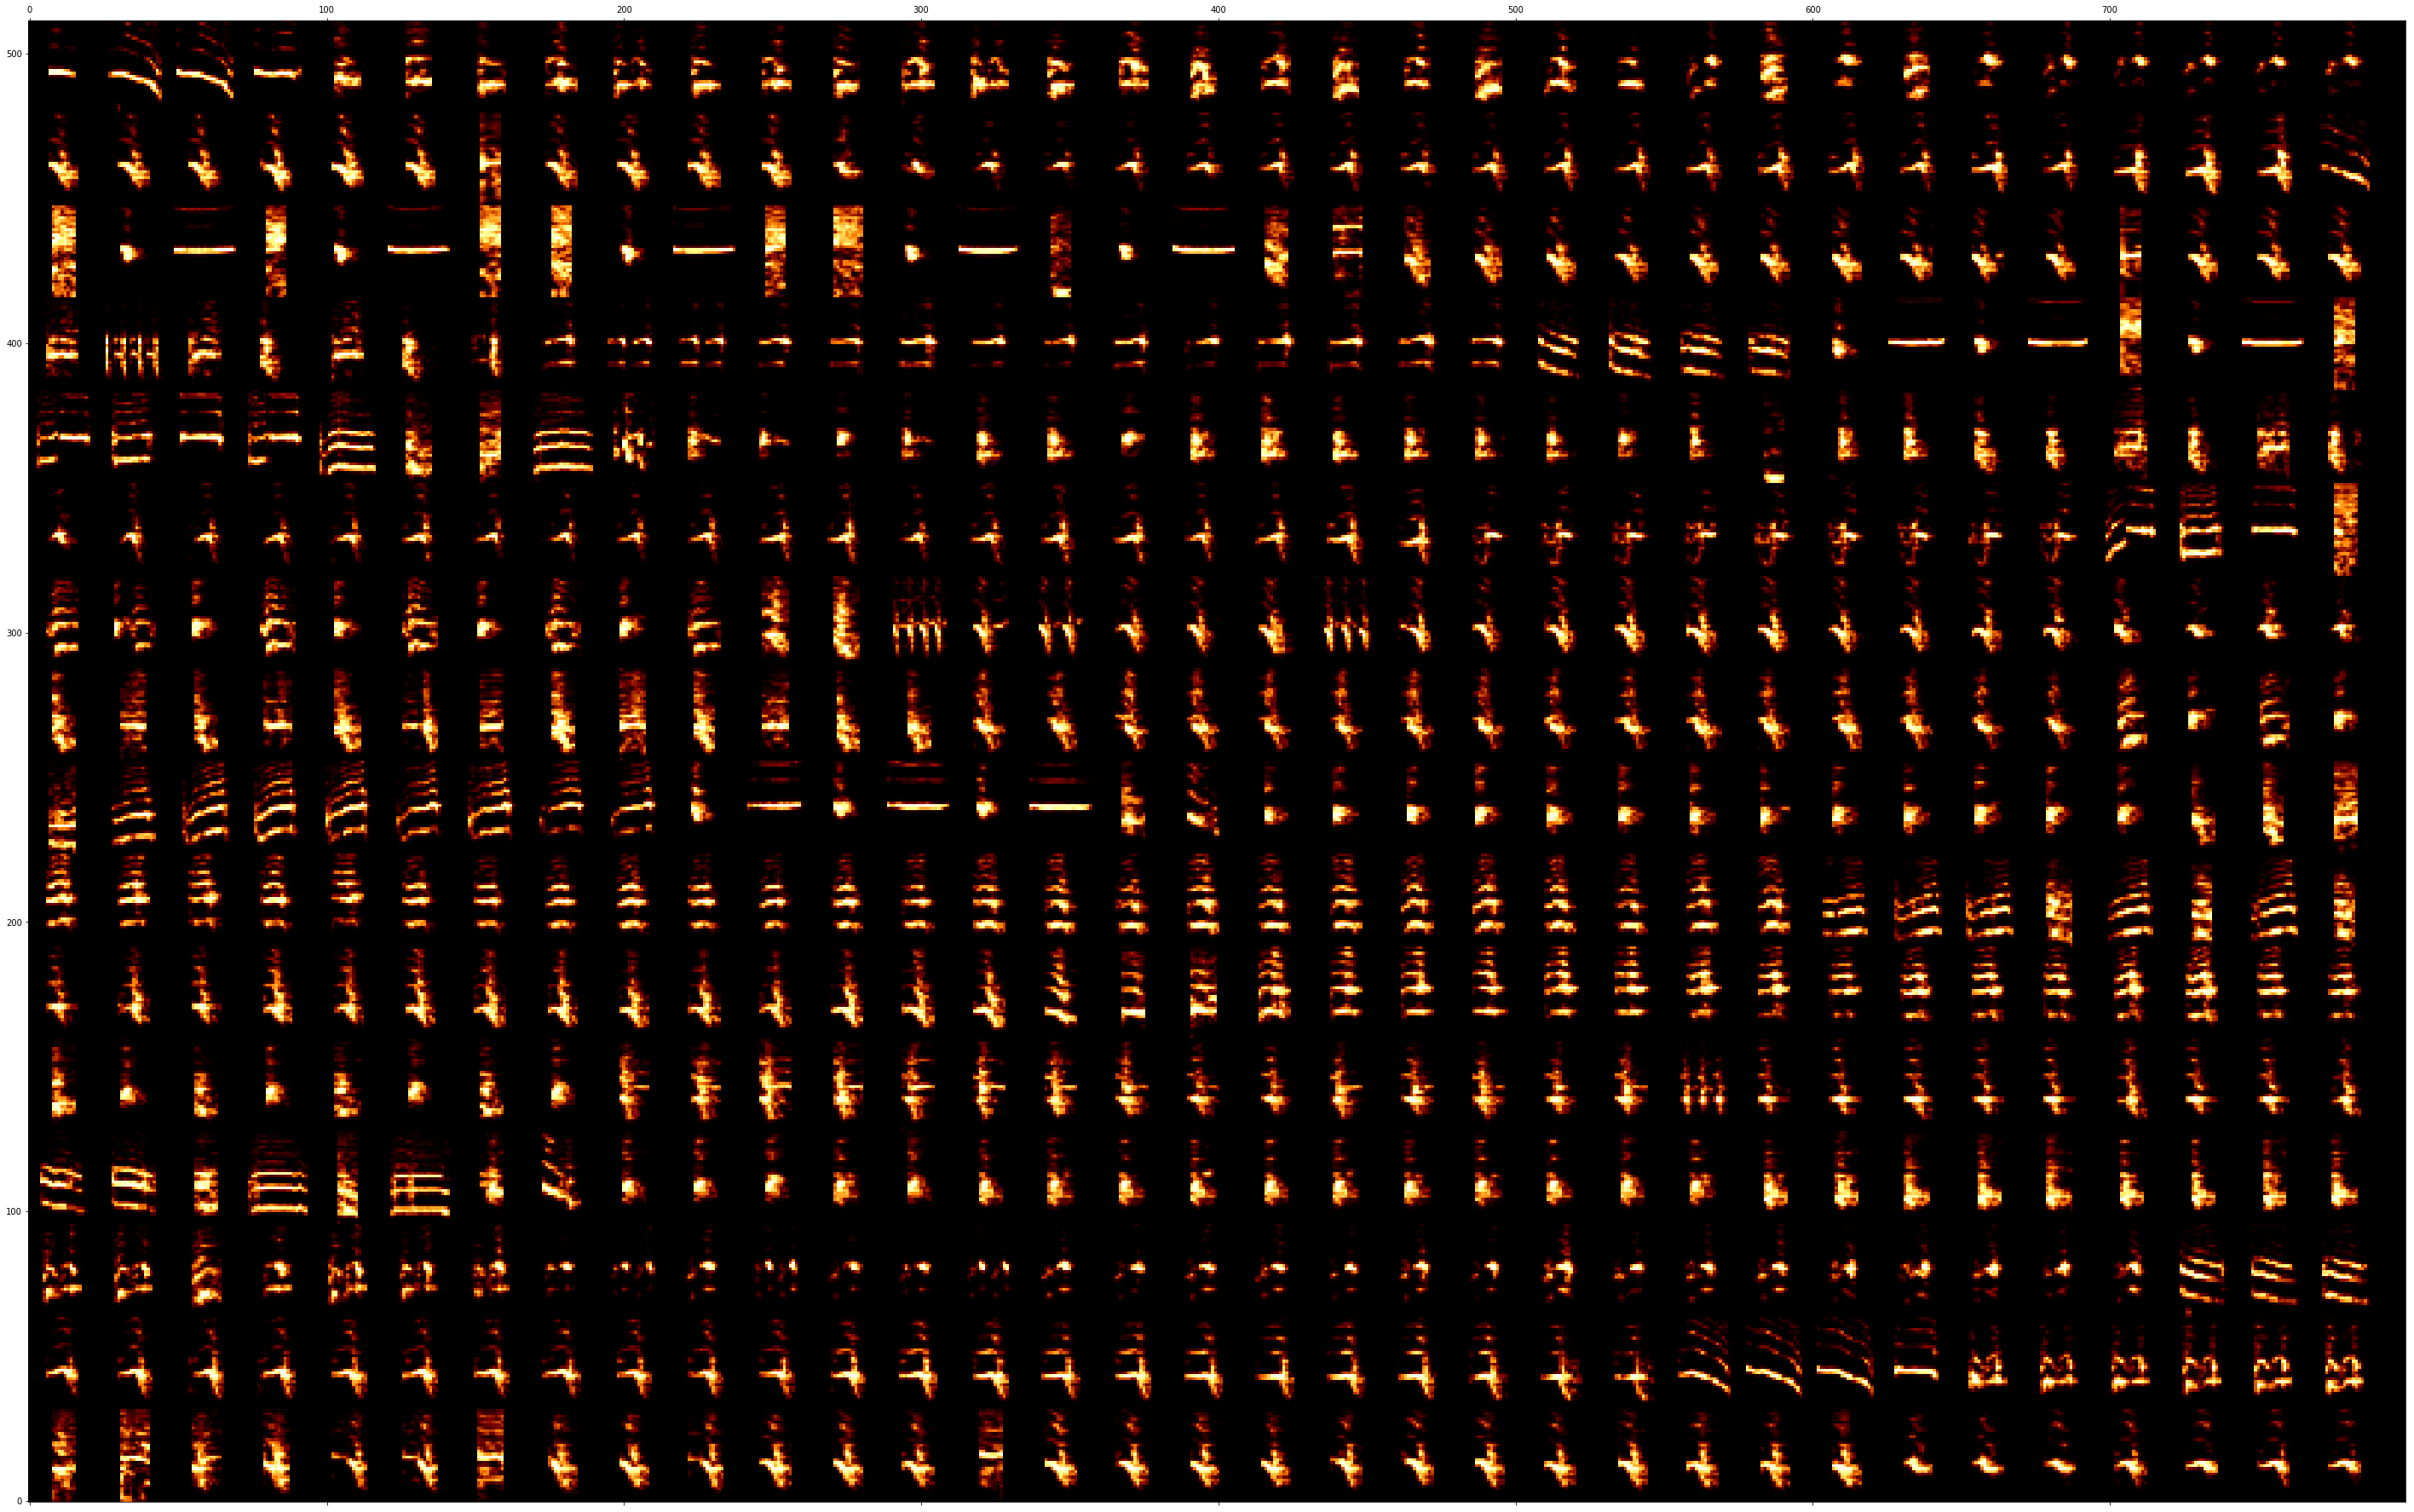

bird3 132223
(50.0, 32) (512, 800) 25.0 32 800


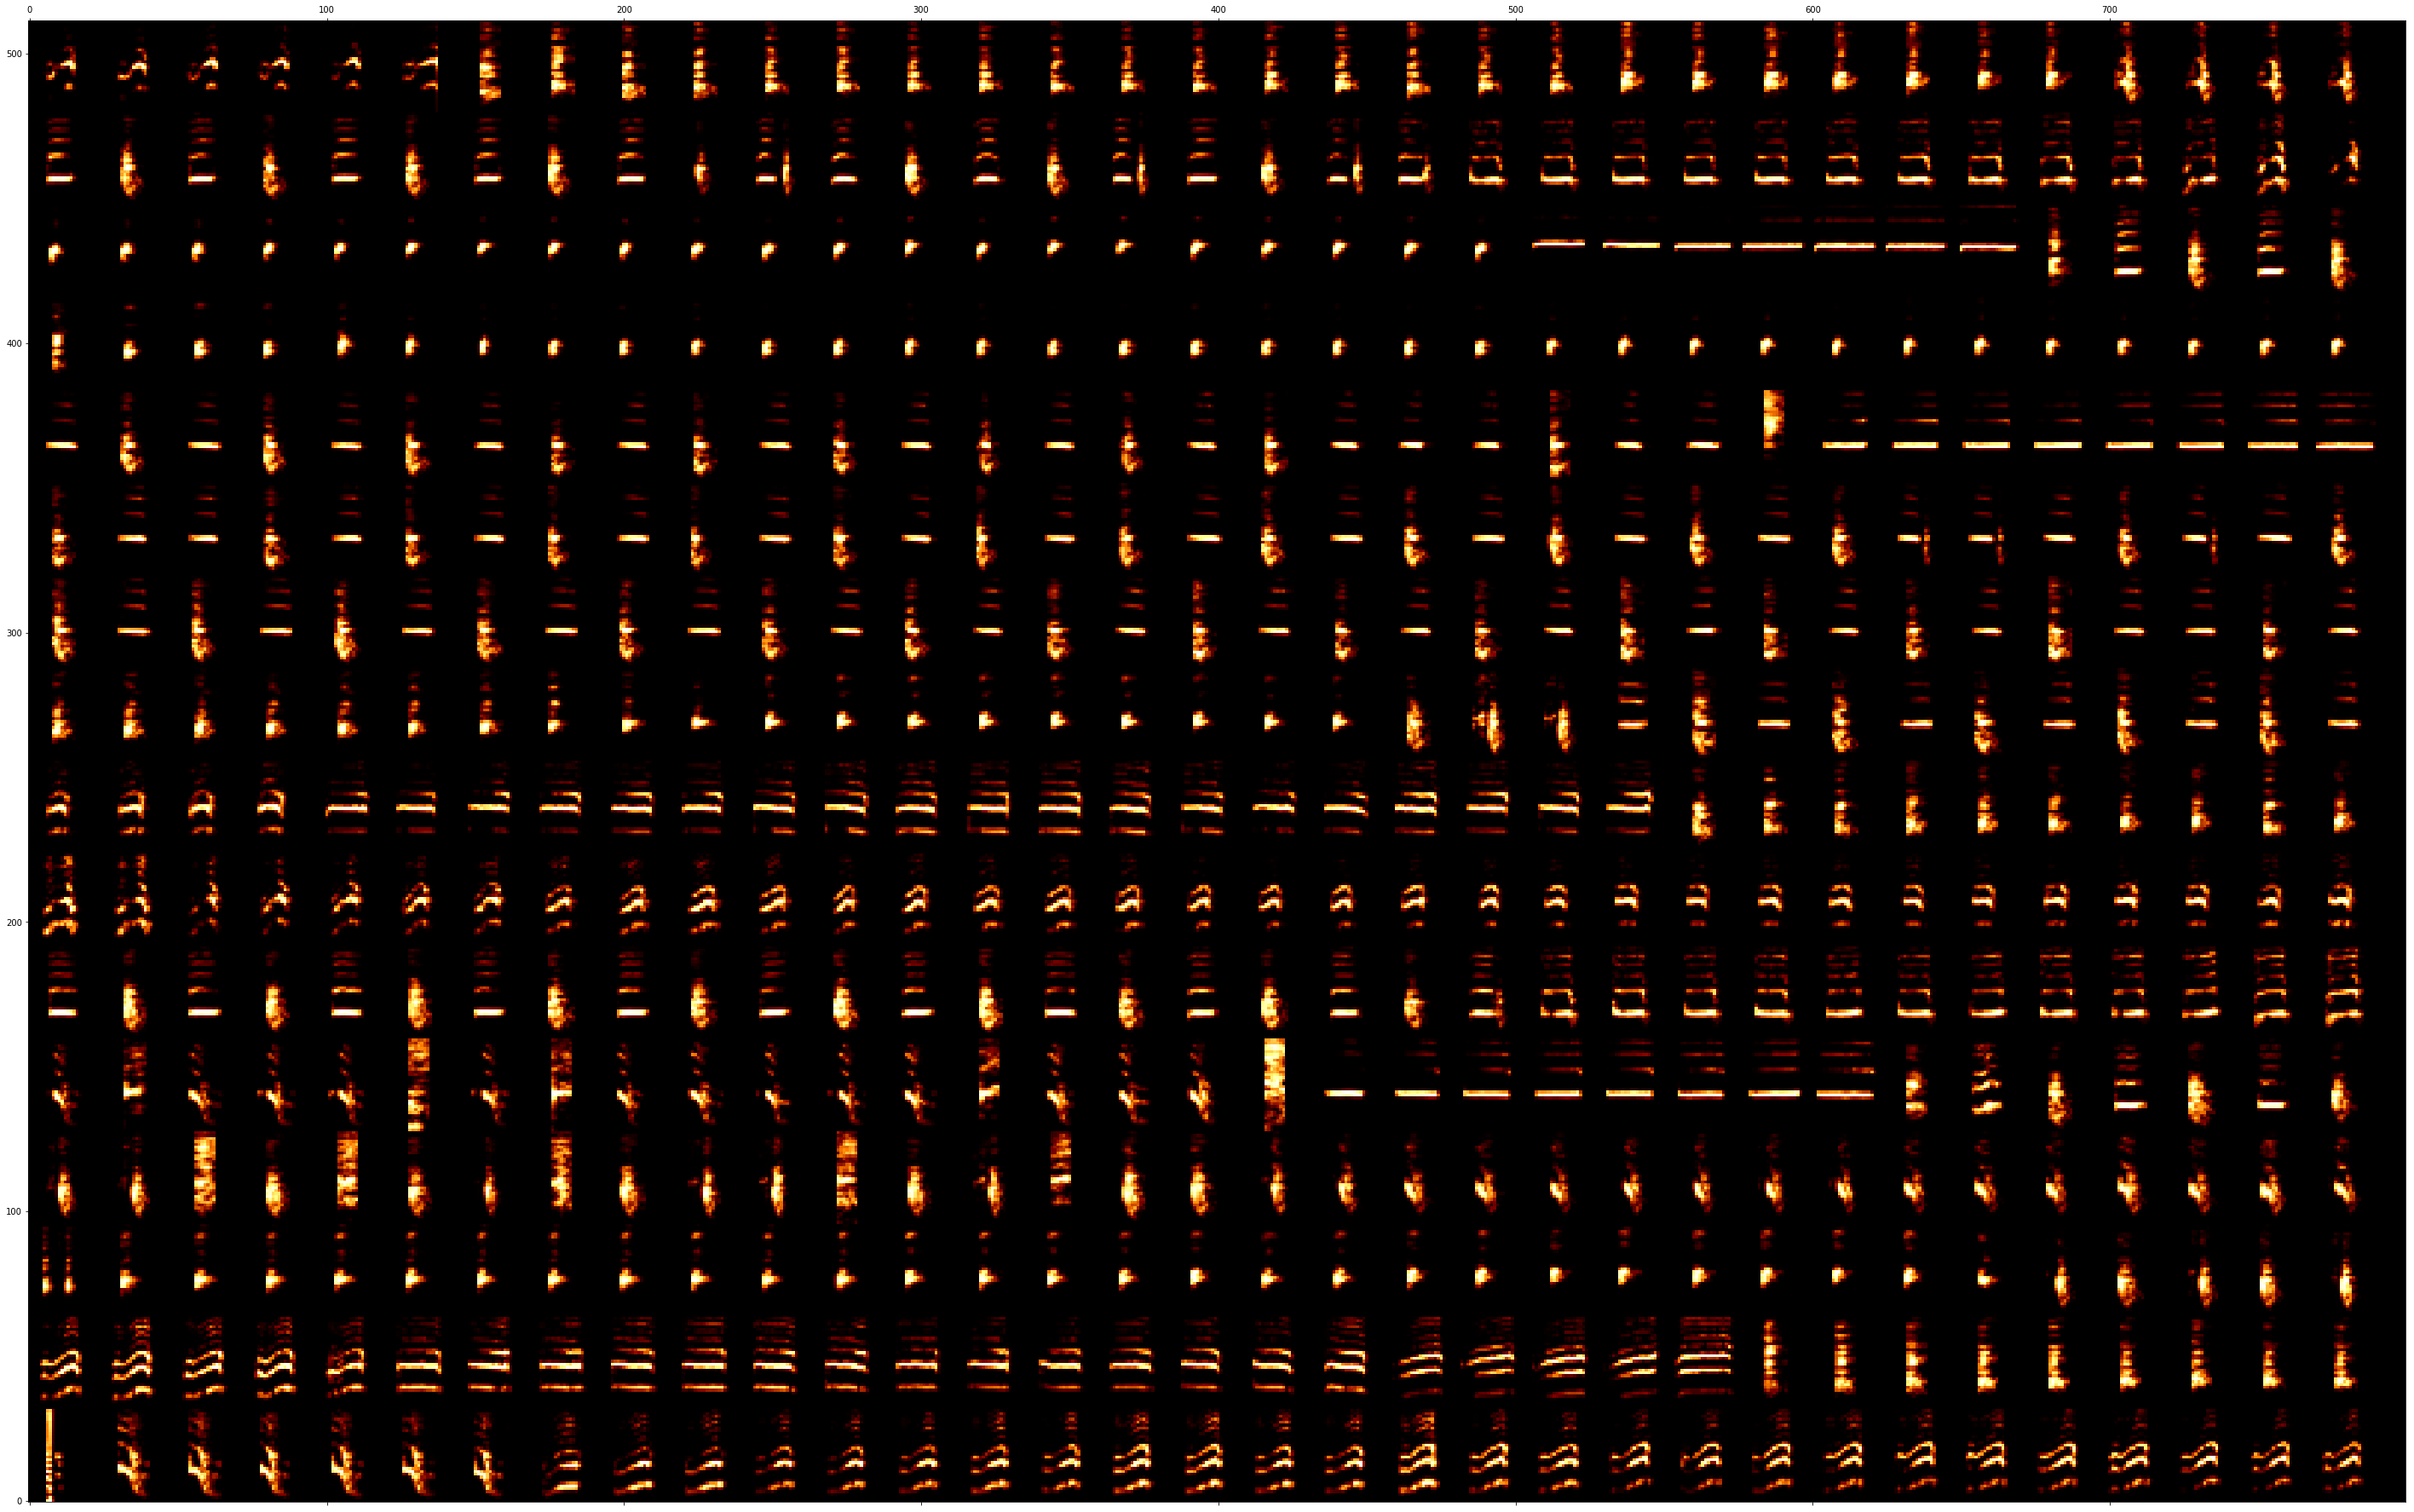

bird4 114634
(50.0, 32) (512, 800) 25.0 32 800


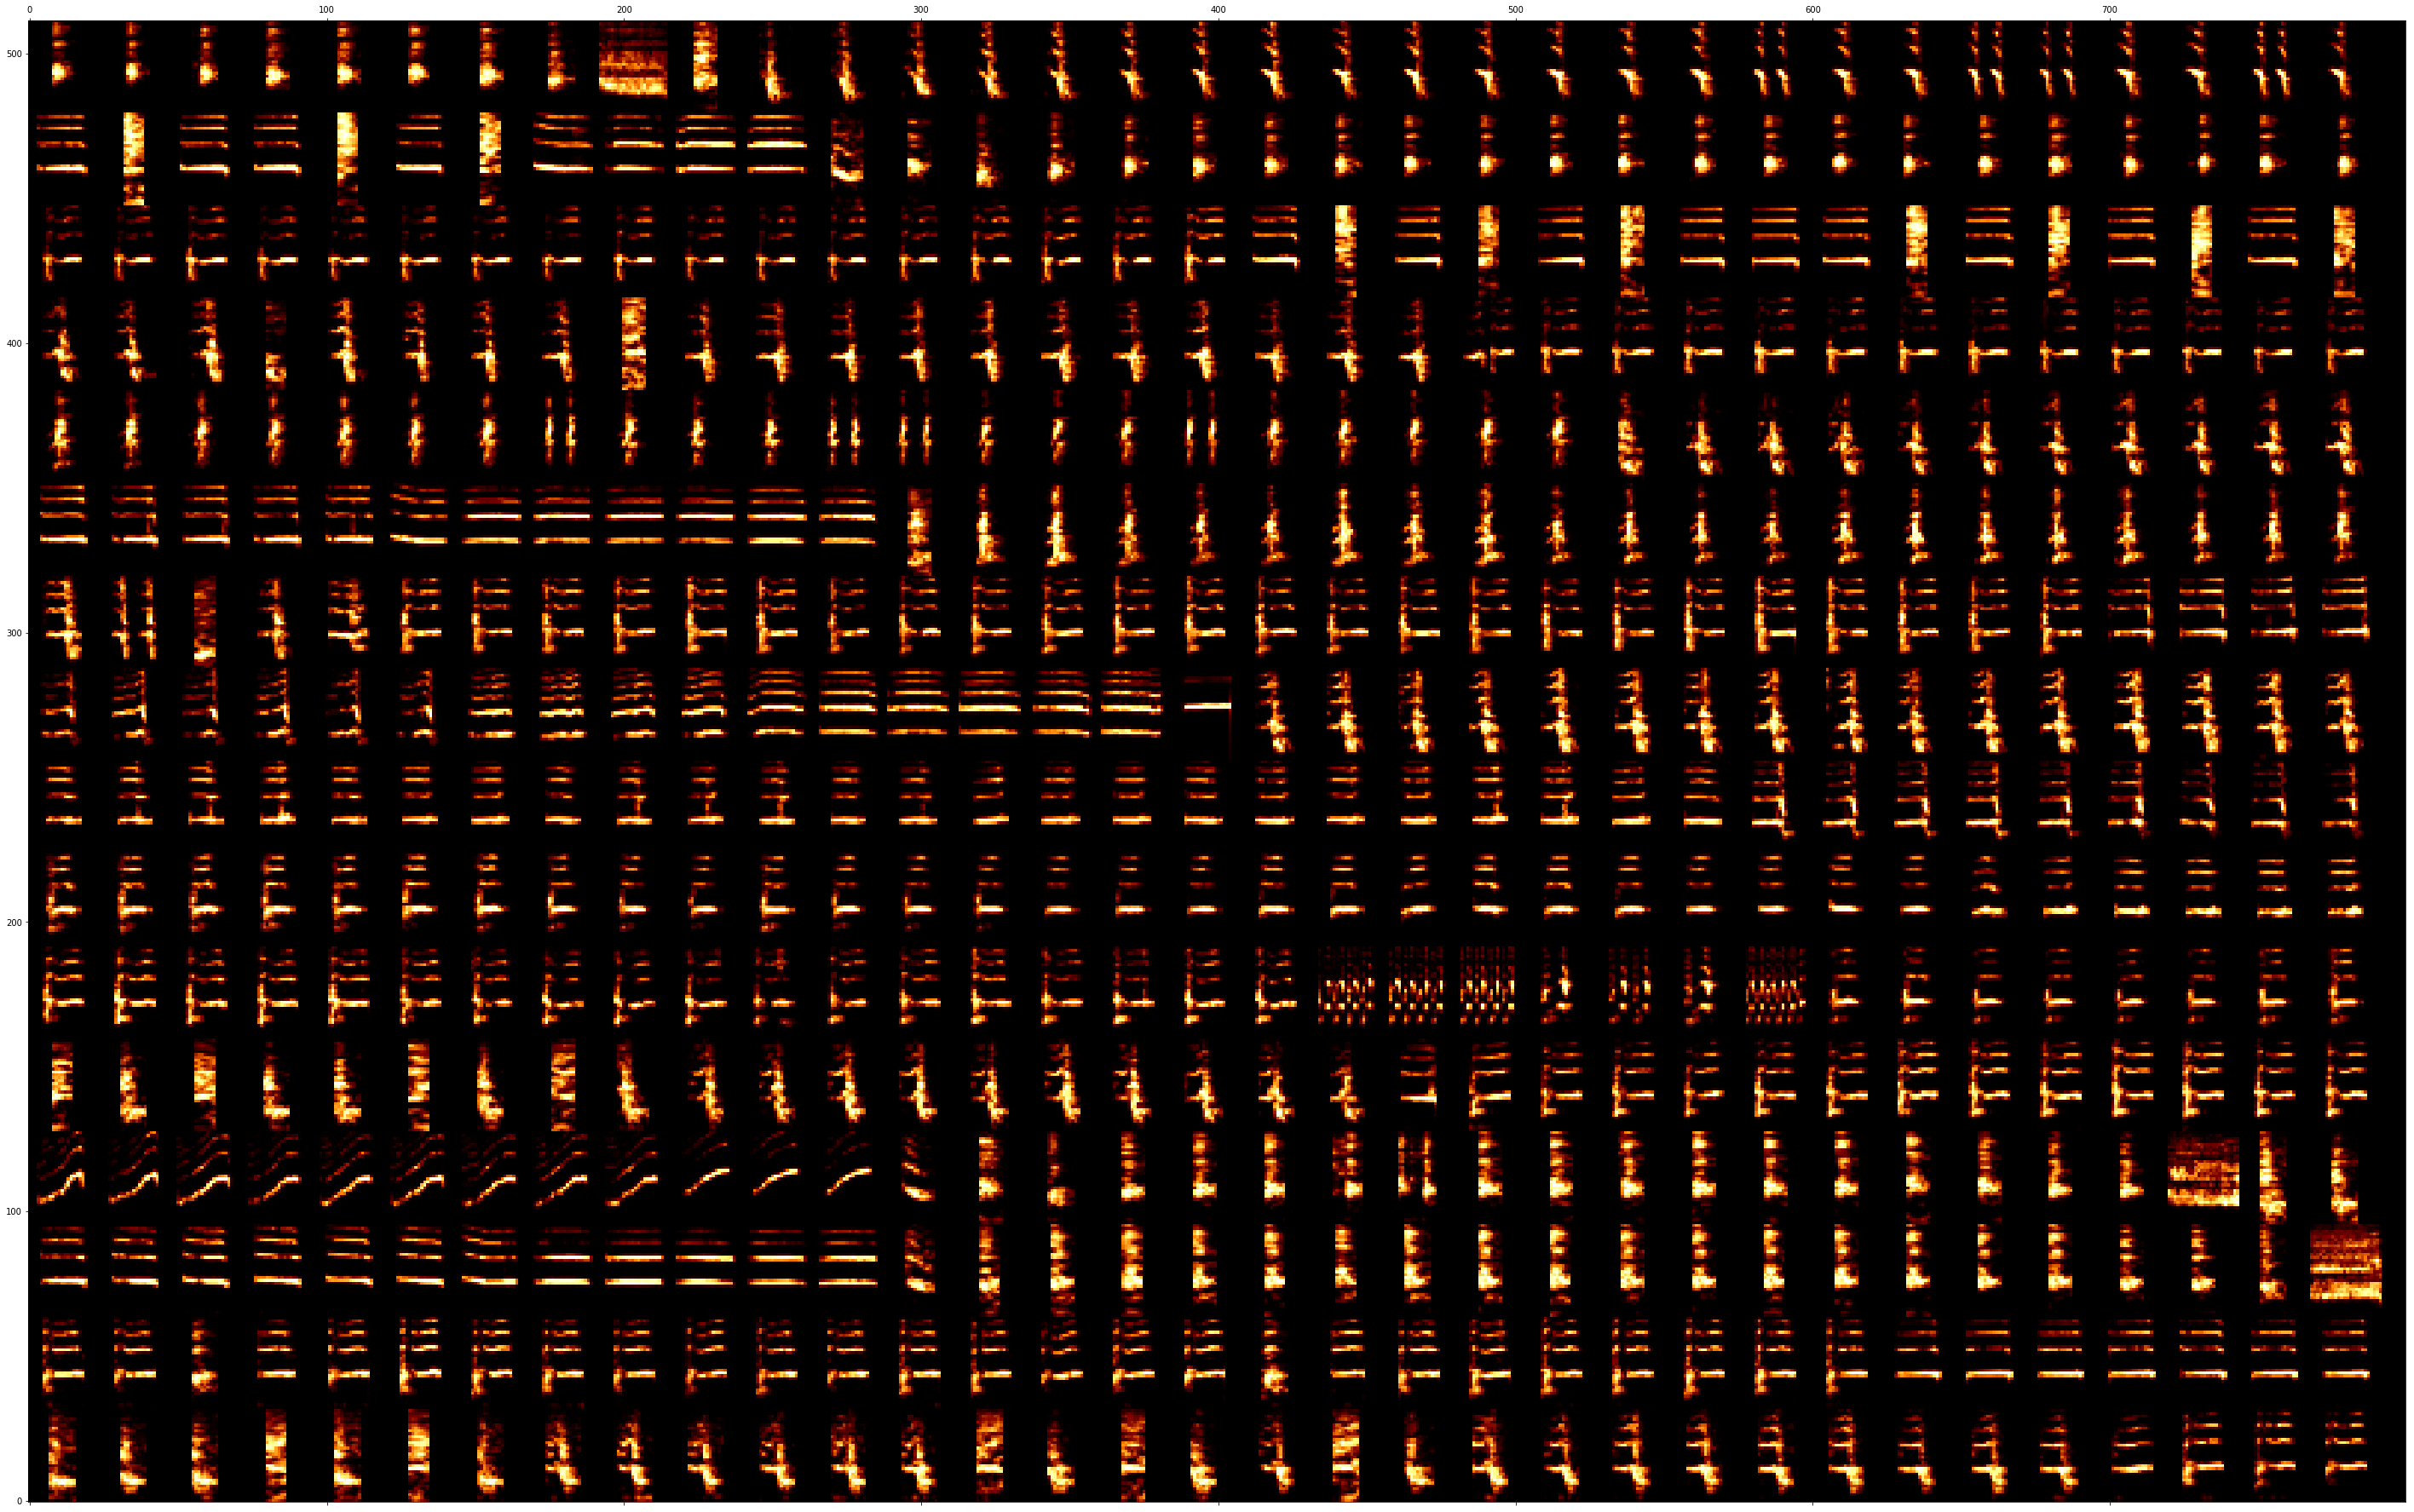

bird6 106088
(50.0, 32) (512, 800) 25.0 32 800


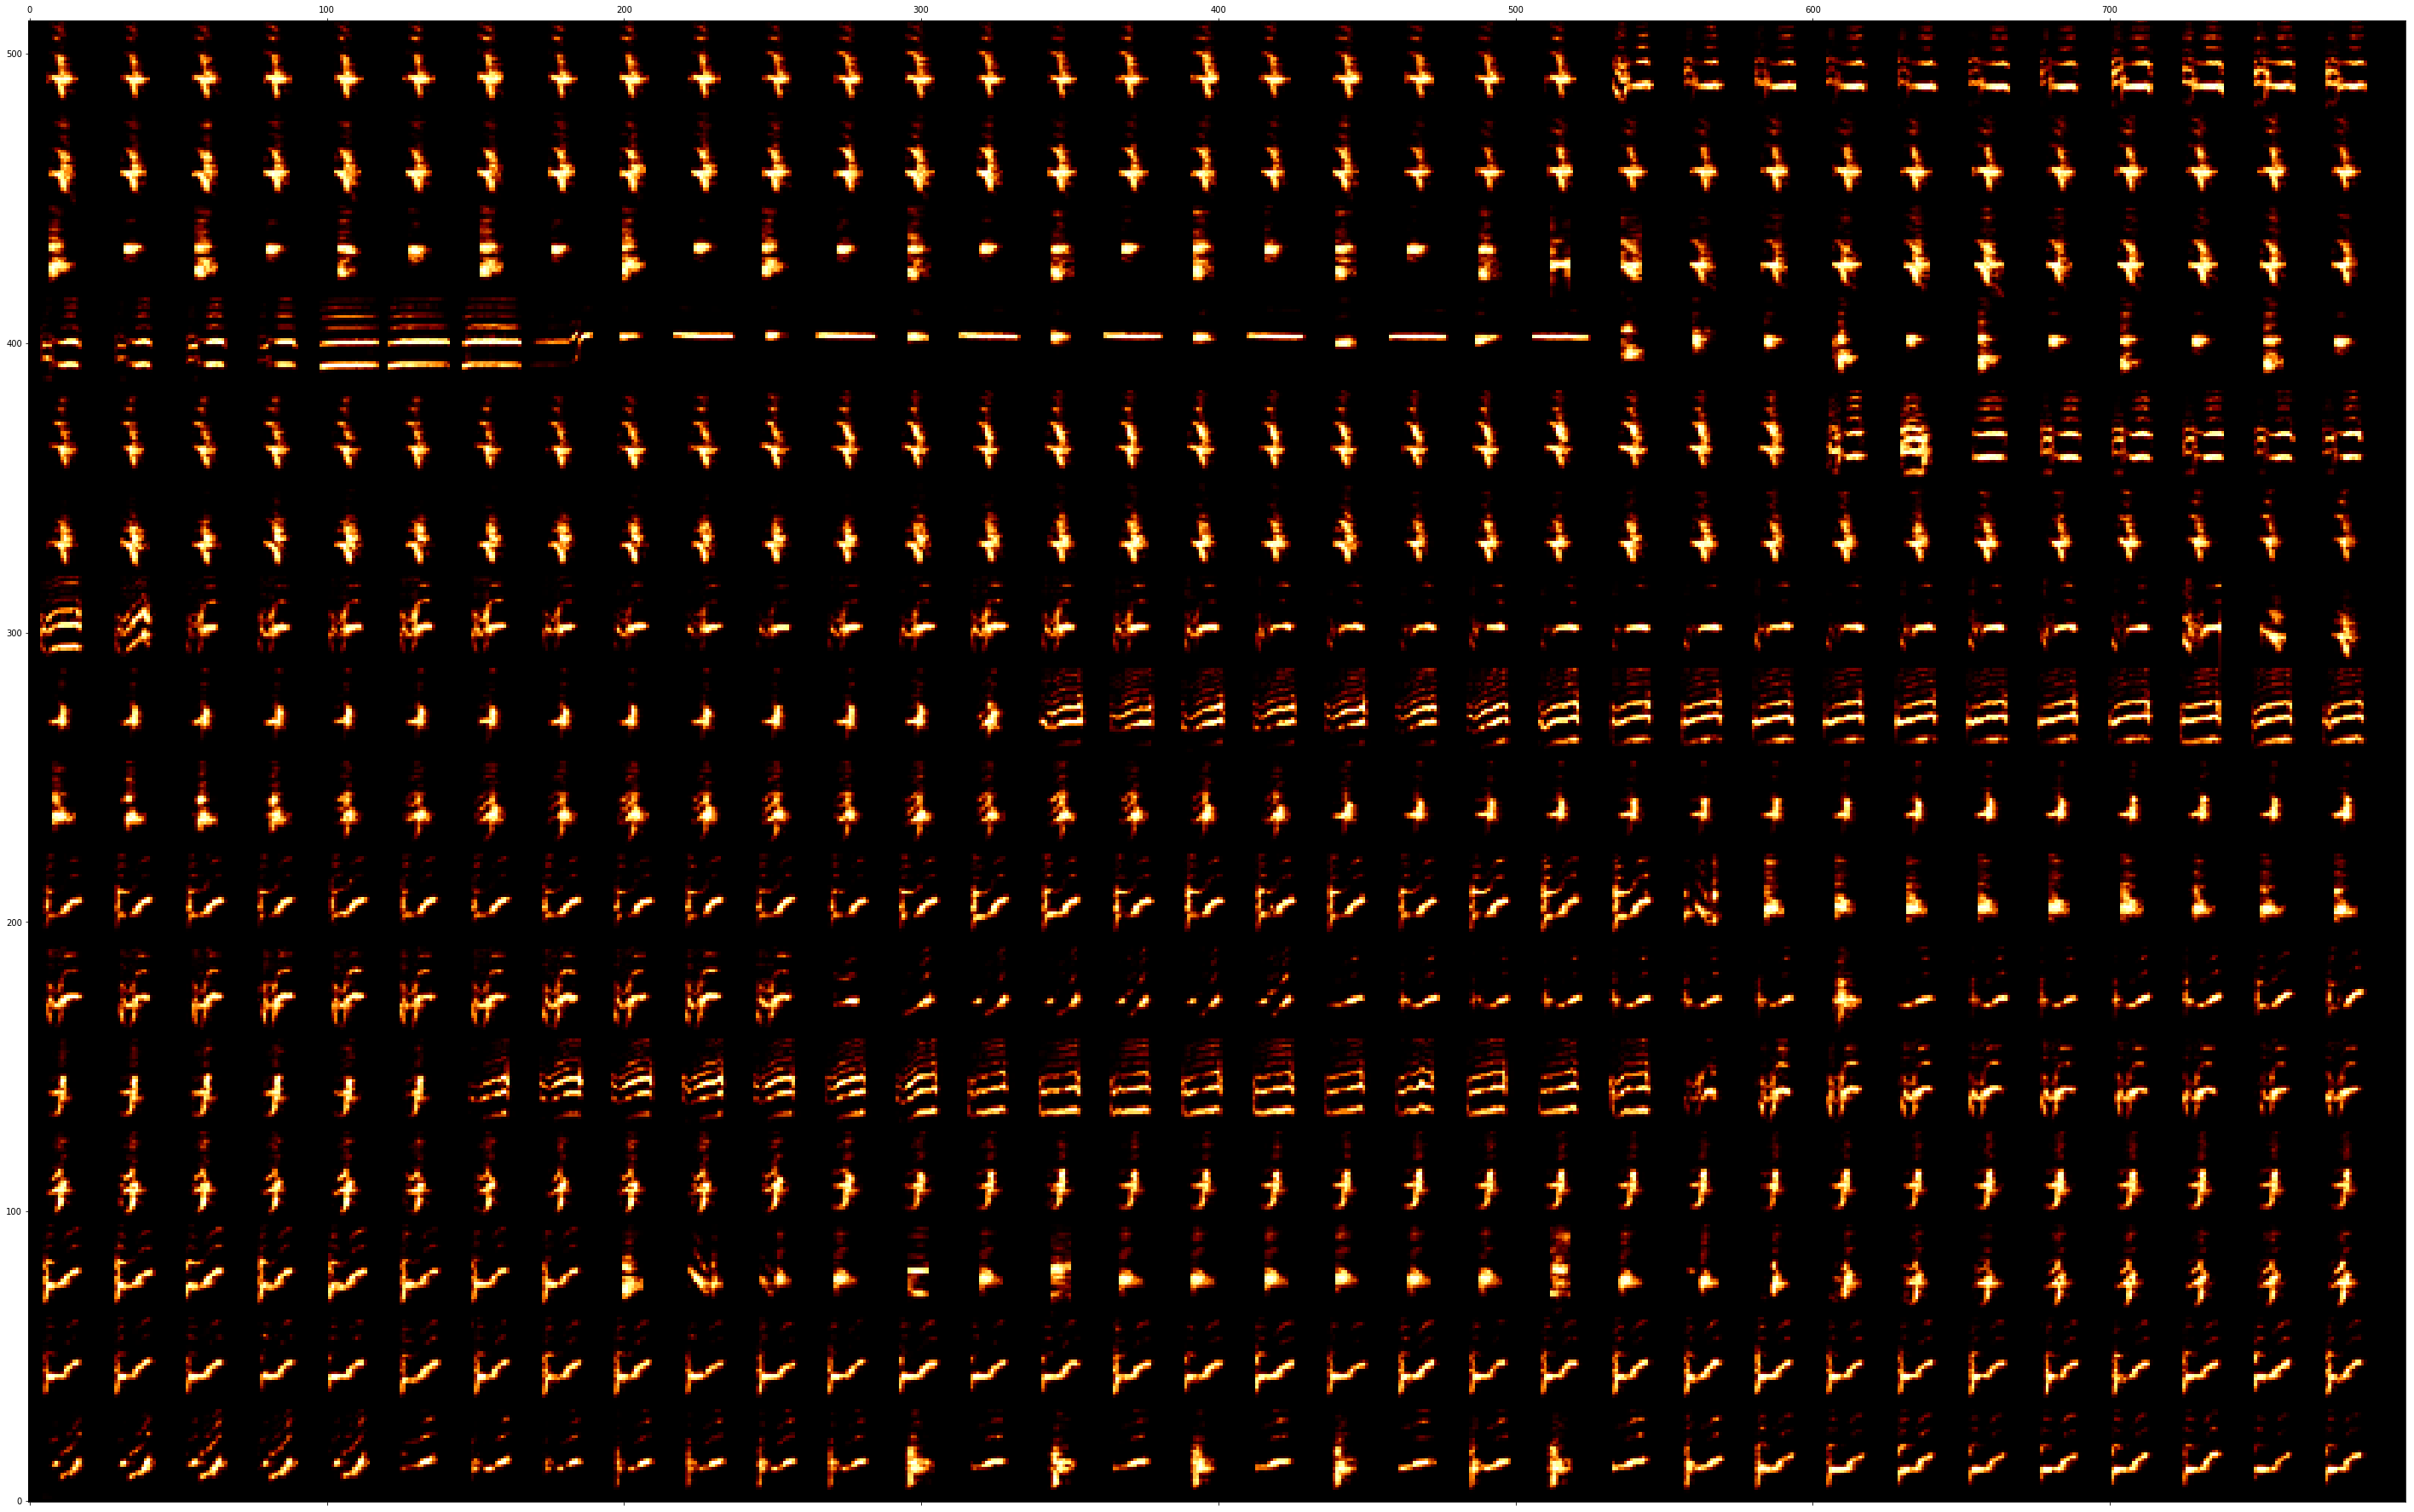

In [37]:
for indv in np.sort(syllable_df.indv.unique()):
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=2,
                  maxrows=16, 
                  colsize=25)

### save dataset

In [38]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'canary.pickle'
ensure_dir(save_loc)
syllable_df.to_pickle(save_loc)